#Tokenization using Spacy


In [2]:
import spacy

nlp = spacy.load('en_core_web_sm')

In [3]:
text = "Mobile phone is good but the camera is not."

In [4]:
doc = nlp(text)

In [5]:
for i in doc:
  print(i)

Mobile
phone
is
good
but
the
camera
is
not
.


#Stop Words Removal

In [6]:
from spacy.lang.en.stop_words import STOP_WORDS

In [7]:
len(STOP_WORDS)

326

In [8]:
print(STOP_WORDS)

{'whether', 'too', 'two', 'latterly', 'had', 'more', 'one', 'seem', 'than', 'front', 'over', 'such', 'well', 'nobody', 'be', 'hundred', 'did', 'themselves', 'who', 'thereby', 'everyone', 'still', 'mine', 'he', 'can', 'along', 'five', 'nothing', 'off', 'made', "'re", 'give', 'being', 'indeed', 'herself', '‘m', 'really', 'them', 'elsewhere', 'therein', 'might', "'m", 'used', 'least', 'however', 'that', 'an', 'not', 'hers', 'him', 'although', 'my', 'on', 'others', "'d", 'eight', 'few', 'was', 'please', 'under', 'out', 'though', 'anyhow', 'above', 'again', 'sixty', 'due', 'take', 'whither', 'cannot', 'between', 'while', 'within', 'anywhere', 'first', 'become', 'using', 'our', 'top', 'yet', 'around', 'each', 'side', 'serious', 'third', 'whole', 'n‘t', 'as', 'against', 'me', 'why', 'their', 'namely', 'does', 'regarding', '’ll', 'less', 'its', 'she', 'but', 'the', 'could', 'six', 'noone', 'afterwards', 'of', 'whereas', 'is', 'anyone', 'almost', 'behind', 'becoming', 'across', '’s', 'yourself'

In [9]:
for i in doc:
  if i.is_stop !=True and i.is_punct != True:
    print(i)

Mobile
phone
good
camera


#Vectorization

In [11]:
from sklearn.feature_extraction.text import CountVectorizer

In [12]:
vectorizer = CountVectorizer()

In [13]:
sample_text = ['Julie loves John more than Linda loves John','Jane loves John more than Julie loves John']

In [14]:
vectorizer.fit(sample_text)

CountVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.int64'>, encoding='utf-8', input='content',
                lowercase=True, max_df=1.0, max_features=None, min_df=1,
                ngram_range=(1, 1), preprocessor=None, stop_words=None,
                strip_accents=None, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, vocabulary=None)

In [15]:
print(vectorizer.vocabulary_)

{'julie': 2, 'loves': 4, 'john': 1, 'more': 5, 'than': 6, 'linda': 3, 'jane': 0}


In [ ]:
vector = vectorizer.transform(['Julie loves John more than Linda loves John'])

In [ ]:
print(vector)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1


In [16]:
from sklearn.feature_extraction.text import TfidfVectorizer

In [17]:
tfvectorizer = TfidfVectorizer()

In [18]:
tfvectorizer.fit(sample_text)

TfidfVectorizer(analyzer='word', binary=False, decode_error='strict',
                dtype=<class 'numpy.float64'>, encoding='utf-8',
                input='content', lowercase=True, max_df=1.0, max_features=None,
                min_df=1, ngram_range=(1, 1), norm='l2', preprocessor=None,
                smooth_idf=True, stop_words=None, strip_accents=None,
                sublinear_tf=False, token_pattern='(?u)\\b\\w\\w+\\b',
                tokenizer=None, use_idf=True, vocabulary=None)

In [19]:
tfvectorizer.vocabulary_

{'jane': 0,
 'john': 1,
 'julie': 2,
 'linda': 3,
 'loves': 4,
 'more': 5,
 'than': 6}

In [20]:
vector1 = tfvectorizer.transform(['Julie loves John more than Linda loves John'])

In [21]:
print(vector1)

  (0, 6)	0.2776136126156931
  (0, 5)	0.2776136126156931
  (0, 4)	0.5552272252313862
  (0, 3)	0.39017624606721324
  (0, 2)	0.2776136126156931
  (0, 1)	0.5552272252313862


In [ ]:
print(vector)

  (0, 1)	2
  (0, 2)	1
  (0, 3)	1
  (0, 4)	2
  (0, 5)	1
  (0, 6)	1


## Topic Modeling Using LDA

In [24]:
import spacy
nlp = spacy.load('en_core_web_sm')

import gensim

import pandas as pd
from gensim import corpora

import re

In [25]:
nlp.vocab['star'].is_stop = True
nlp.vocab['stars'].is_stop = True
nlp.vocab['good'].is_stop = True

In [26]:
#pandas
reviews = pd.read_csv('Flipkart_ratings.csv')

In [27]:
reviews.shape

(4652, 13)

In [28]:
#pandas
reviews['star_rating'] = reviews['star_rating'].apply(lambda x:1 if x > 4 else 0)

In [29]:
#pandas
negative_sentiments = reviews[reviews['star_rating'] == 0]
print(negative_sentiments.shape[0])

2082


In [ ]:
#pandas
negative_sentiments['Final review'] = negative_sentiments['review_headline'] + ' ' + negative_sentiments['review_body']
negative_sentiments['Final review'] = negative_sentiments['Final review'].str.replace("[^a-zA-Z#]", " ")

In [31]:
#pandas
negative_sentiments = negative_sentiments.dropna()

In [32]:
#tokenization, stop words removal
negative_sentiments['Final Text'] = ''
for i in range(negative_sentiments.shape[0]):
    temp = []
    document = nlp(negative_sentiments['Final review'].iloc[i].lower())
    for j in document:
        if j.is_stop!=True and j.is_punct!=True:
            temp.append(j.lemma_)
    negative_sentiments['Final Text'].iloc[i] = temp


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [33]:
#vectoriazation and topic modeling 
def topic_modelling(text):
    dictionary = corpora.Dictionary(text)
    doc_term_matrix = [dictionary.doc2bow(rev) for rev in text]
    LDA = gensim.models.ldamodel.LdaModel
    lda_model = LDA(corpus = doc_term_matrix, id2word = dictionary, 
                    num_topics = 1, random_state = 19, passes = 50)
    temp = re.findall('[a-z]*',lda_model.print_topics()[0][1])
    tags = [x for x in temp if x]
    return tags

In [35]:
#pandas
negative_sentiments['Final Text'] = negative_sentiments['Final Text'].apply(lambda x:' '.join(x))
negative_sentiments.head(2)

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Final review,Final Text
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,1,N,Y,One Star,garbage,31-08-2015,One Star garbage,g a r b a g e
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,Doesn t work as advertised Didn t work as adve...,d o e s n t w o r k a d v e r t i s e ...


In [36]:
#pandas
negative_sentiments['Review Tags'] = negative_sentiments['Final Text'].apply(lambda x: topic_modelling([x.split(' ')]))
negative_sentiments.head(2)

,marketplace,customer_id,review_id,product_title,product_category,star_rating,helpful_votes,total_votes,vine,verified_purchase,review_headline,review_body,review_date,Final review,Final Text,Review Tags
0,US,41099022,R59VGL4HIPFDP,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,1,N,Y,One Star,garbage,31-08-2015,One Star garbage,g a r b a g e,"[a, g, b, e, r]"
1,US,15744366,R3GR0Z9Z4Z1295,Foscam FI8910W Wireless/Wired Pan & Tilt IP/Ne...,Camera,0,0,0,N,N,Doesn't work as advertised,"Didn't work as advertised, there was no sound ...",31-08-2015,Doesn t work as advertised Didn t work as adve...,d o e s n t w o r k a d v e r t i s e ...,"[d, r, e, n, t, o, u, s, w]"


In [ ]:
from functools import reduce

final_list = reduce(lambda x,y :x+y ,negative_sentiments['Review Tags'].dropna().values.tolist())
final_list

In [40]:
dic = {}
for i in final_list:
    if i not in dic.keys():
        dic[i] = 1
    else:
        dic[i] = dic[i] + 1

In [ ]:
#pandas
df = pd.Series(dic)
df = df.drop(['t','s'])
df = df.sort_values(ascending = False)
df.head(20)

In [45]:
#data visualization, matplotlib & seaborn
import matplotlib.pyplot as plt
import seaborn as sns

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


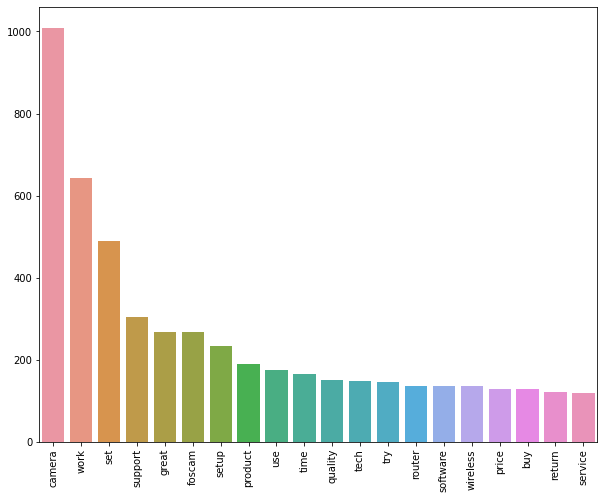

In [ ]:
#data visualization, matplotlib & seaborn
fig = plt.figure(figsize = (10,8))
sns.barplot(df.head(20).index.values.tolist(), df.head(20).values.tolist())
plt.xticks(rotation = 90)
plt.show()